<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/search_dep_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
url = '../../data/0&1/oversampling/oversampled_secd_diag.csv'
sampled_dep_score = pd.read_csv(url)

X_s = sampled_dep_score.copy()
del X_s['secd_diag']

y_s = sampled_dep_score['secd_diag']

In [3]:
y_s.value_counts()

0.0    2721
1.0    2721
Name: secd_diag, dtype: int64

In [4]:
print(X_s)
print(y_s)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             1          1          1          1        2        1
1             2          2          2          2        1        1
2             1          1          0          0        2        2
3             0          0          2          2        1        2
4             2          3          1          1        2        3
...         ...        ...        ...        ...      ...      ...
5437          3          3          1          1        1        1
5438          3          3          1          1        2        3
5439          3          3          1          1        2        2
5440          2          2          1          1        1        2
5441          1          1          1          2        2        1

[5442 rows x 6 columns]
0       1.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
5437    1.0
5438    0.0
5439    0.0
5440    0.0
5441    0.0
Name: secd_diag, Length: 5442, dtype: f

# 2. sampled

# SVM 

## Seed 100

In [5]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [6]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.6148193508879363
F1 score micro: 0.6148193508879363
F1 score binary: 0.5944551901998711

classification report:
               precision    recall  f1-score   support

         0.0       0.60      0.67      0.63       811
         1.0       0.63      0.56      0.59       822

    accuracy                           0.61      1633
   macro avg       0.62      0.62      0.61      1633
weighted avg       0.62      0.61      0.61      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


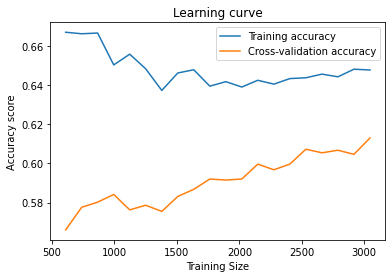

In [7]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='rbf', C=10, gamma=0.1)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [8]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [9]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.6184935701163503
F1 score micro: 0.6184935701163503
F1 score binary: 0.5876902713434812

classification report:
               precision    recall  f1-score   support

         0.0       0.61      0.68      0.65       829
         1.0       0.63      0.55      0.59       804

    accuracy                           0.62      1633
   macro avg       0.62      0.62      0.62      1633
weighted avg       0.62      0.62      0.62      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


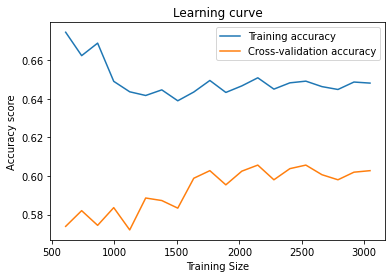

In [10]:
plot_model = svm.SVC(kernel='rbf', C=10, gamma=0.1)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [11]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [12]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.6037966932026945
F1 score micro: 0.6037966932026945
F1 score binary: 0.5828497743391361

classification report:
               precision    recall  f1-score   support

         0.0       0.58      0.67      0.62       798
         1.0       0.63      0.54      0.58       835

    accuracy                           0.60      1633
   macro avg       0.61      0.61      0.60      1633
weighted avg       0.61      0.60      0.60      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


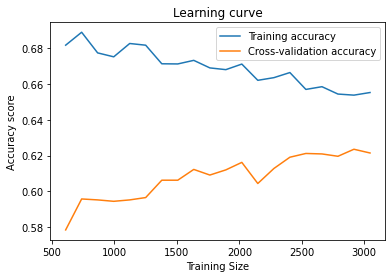

In [13]:
plot_model = svm.SVC(kernel='rbf', C=10, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [159]:
# learning curve considering different seeds 

In [14]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

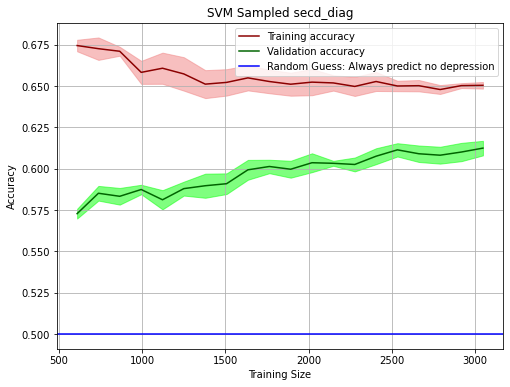

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Sampled secd_diag')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

The learning algorithm suffers from high variance. The training and validation curve look like it is converging. Training with more data is likely to help. Although they converge, the error is quite high. This indicates that it is unlikely to have the relationship between screen time and mental health.

# Logistic Regression

## Seed 100

In [16]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [17]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.5345988977342315
F1 score micro: 0.5345988977342315
F1 score binary: 0.5202020202020202

classification report:
               precision    recall  f1-score   support

         0.0       0.53      0.57      0.55       811
         1.0       0.54      0.50      0.52       822

    accuracy                           0.53      1633
   macro avg       0.53      0.53      0.53      1633
weighted avg       0.54      0.53      0.53      1633



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.5014434         nan 0.49514418 0.53006508
 0.53006508 0.53111116 0.53006508 0.53006508        nan        nan
        nan        nan        nan 0.54633805 0.54607558        nan
 0.54633805 0.54633805        nan        nan 0.5014434         nan
 0.50196833 0.53006508 0.53006508 0.53111116 0.53006508 0.53006508
        nan        nan        nan        nan        nan 0.54633805
 0.54607558        nan 0.54633805 0.54633805        nan        nan
        nan        nan 0.495407   0.53557517 0.53557517        nan
 0.53715204 0.53557517        nan        nan        nan        nan
        nan 0.54633805 0.54633805        nan 0.54633805 0.54633805
        nan        nan 0.5014434         nan 0.49671899 0.53741382
 0.53741382 0.53373893 0.53557655 0.53557655        nan        nan
        nan        n

[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


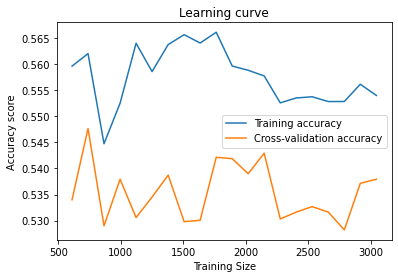

In [18]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l1', solver='saga')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [19]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [20]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.552357624004899
F1 score micro: 0.552357624004899
F1 score binary: 0.5635820895522389

classification report:
               precision    recall  f1-score   support

         0.0       0.56      0.52      0.54       829
         1.0       0.54      0.59      0.56       804

    accuracy                           0.55      1633
   macro avg       0.55      0.55      0.55      1633
weighted avg       0.55      0.55      0.55      1633



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.49671899        nan 0.48727017 0.48148968
 0.48148968 0.49461891 0.48148968 0.48148968        nan        nan
        nan        nan        nan 0.53583005 0.53583005        nan
 0.53583005 0.53583005        nan        nan 0.49671899        nan
 0.51063009 0.48148968 0.48148968 0.49461891 0.48148968 0.48148968
        nan        nan        nan        nan        nan 0.53583005
 0.53583005        nan 0.53583005 0.53583005        nan        nan
        nan        nan 0.50879248 0.49593366 0.49593366        nan
 0.49593366 0.49593366        nan        nan        nan        nan
        nan 0.53583005 0.53583005        nan 0.53583005 0.53583005
        nan        nan 0.49671899        nan 0.48884497 0.52428425
 0.52428425 0.53268493 0.52428425 0.52428425        nan        nan
        nan        n

[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


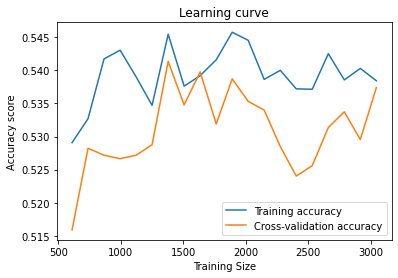

In [21]:
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [22]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [23]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.5437844458052664
F1 score micro: 0.5437844458052664
F1 score binary: 0.5010046885465506

classification report:
               precision    recall  f1-score   support

         0.0       0.53      0.64      0.58       798
         1.0       0.57      0.45      0.50       835

    accuracy                           0.54      1633
   macro avg       0.55      0.55      0.54      1633
weighted avg       0.55      0.54      0.54      1633



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.50486202        nan 0.5074867  0.51037625
 0.51037625 0.52428667 0.51037625 0.51037625        nan        nan
        nan        nan        nan 0.55237479 0.55237479        nan
 0.55237479 0.55237479        nan        nan 0.50486202        nan
 0.50038732 0.51037625 0.51037625 0.52428667 0.51037625 0.51037625
        nan        nan        nan        nan        nan 0.55237479
 0.55237479        nan 0.55237479 0.55237479        nan        nan
        nan        nan 0.50091225 0.52481263 0.52481263        nan
 0.52428701 0.52481263        nan        nan        nan        nan
        nan 0.55237479 0.55237479        nan 0.55237479 0.55237479
        nan        nan 0.50486202        nan 0.49513798 0.53688509
 0.53688509 0.53767249 0.53688509 0.53688509        nan        nan
        nan        n

[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


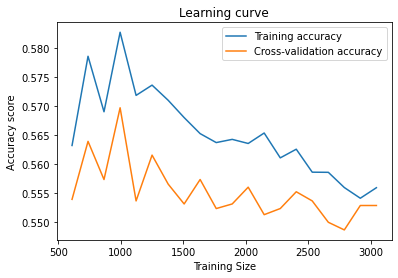

In [24]:
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [171]:
# learning curve considering different seeds 

In [25]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

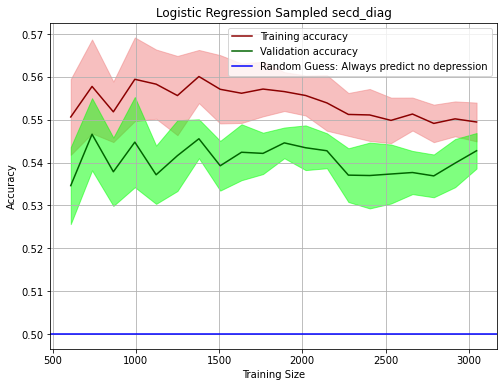

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Sampled secd_diag')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

The training and validation curve look like it is converging. Although they converge, the error is quite high. This indicates that it is unlikely to have the relationship between screen time and mental health. Maybe LR model is not appropriate to find the relationship.

# KNN

## Seed 100

In [27]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [28]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 12, 'weights': 'distance'}
Accuracy: 0.6932026944274342
F1 score micro: 0.6932026944274342
F1 score binary: 0.6987372218881539

classification report:
               precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       811
         1.0       0.69      0.71      0.70       822

    accuracy                           0.69      1633
   macro avg       0.69      0.69      0.69      1633
weighted avg       0.69      0.69      0.69      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


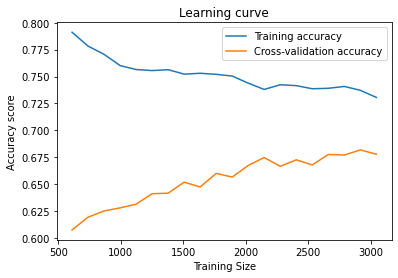

In [29]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, weights='distance', n_neighbors=12)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [30]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [31]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 34, 'weights': 'distance'}
Accuracy: 0.6797305572565829
F1 score micro: 0.6797305572565829
F1 score binary: 0.6870137642130462

classification report:
               precision    recall  f1-score   support

         0.0       0.70      0.65      0.67       829
         1.0       0.66      0.71      0.69       804

    accuracy                           0.68      1633
   macro avg       0.68      0.68      0.68      1633
weighted avg       0.68      0.68      0.68      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


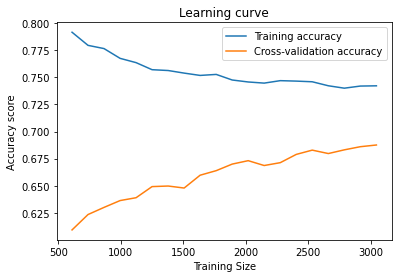

In [32]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, weights='distance', n_neighbors=34)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [33]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [34]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 34, 'n_neighbors': 18, 'weights': 'distance'}
Accuracy: 0.6785058175137784
F1 score micro: 0.6785058175137784
F1 score binary: 0.6858168761220826

classification report:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       798
         1.0       0.69      0.69      0.69       835

    accuracy                           0.68      1633
   macro avg       0.68      0.68      0.68      1633
weighted avg       0.68      0.68      0.68      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


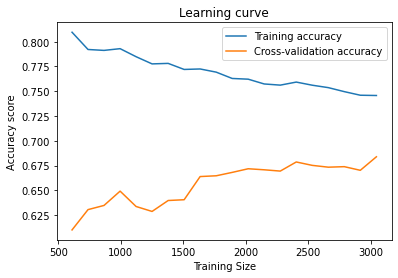

In [35]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=34, weights='distance', n_neighbors=18)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [183]:
# learning curve considering different seeds

In [36]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

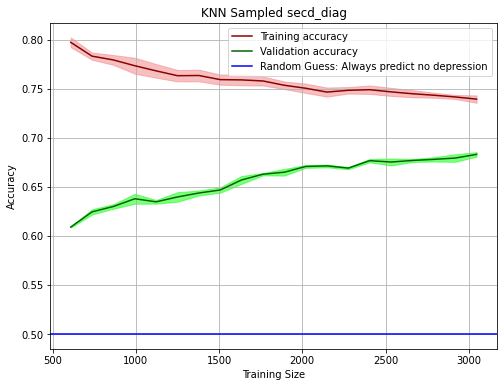

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Sampled secd_diag')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

The error is high. Also, it seems like they are not converging. KNN is not a valid model for detecting the relationship between screen time and mental health?

# Random Forest

## Seed 100

In [38]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [39]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 26, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 38}
Accuracy: 0.6932026944274342
F1 score micro: 0.6932026944274342
F1 score binary: 0.6870705808869456

classification report:
               precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       811
         1.0       0.71      0.67      0.69       822

    accuracy                           0.69      1633
   macro avg       0.69      0.69      0.69      1633
weighted avg       0.69      0.69      0.69      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


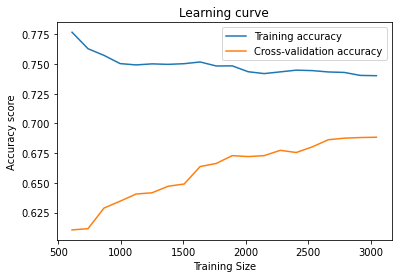

In [40]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=26, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=38)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [41]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [42]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.6968769136558481
F1 score micro: 0.6968769136558481
F1 score binary: 0.6961325966850829

classification report:
               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       829
         1.0       0.69      0.71      0.70       804

    accuracy                           0.70      1633
   macro avg       0.70      0.70      0.70      1633
weighted avg       0.70      0.70      0.70      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


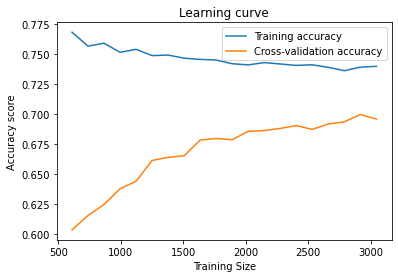

In [43]:
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=50)
2
train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [44]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [45]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 27}
Accuracy: 0.6772810777709737
F1 score micro: 0.6772810777709737
F1 score binary: 0.6846199880311191

classification report:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       798
         1.0       0.68      0.69      0.68       835

    accuracy                           0.68      1633
   macro avg       0.68      0.68      0.68      1633
weighted avg       0.68      0.68      0.68      1633



[learning_curve] Training set sizes: [ 609  737  865  994 1122 1250 1379 1507 1635 1764 1892 2020 2148 2277
 2405 2533 2662 2790 2918 3047]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


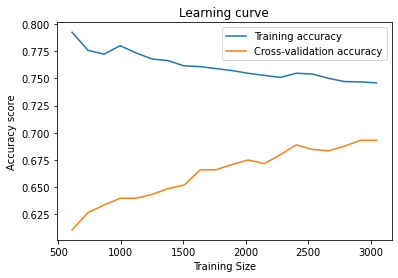

In [46]:
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=50, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=27)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [195]:
# learning curve considering different seeds

In [47]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

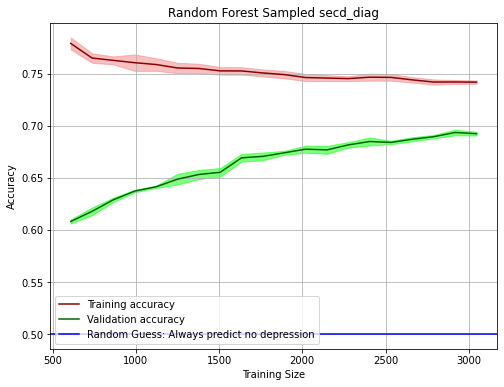

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Sampled secd_diag')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

The error is high. Also, it seems like they are not converging. RF is not a valid model for detecting the relationship between screen time and mental health? 